In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn import model_selection

## Importing Data

In [2]:
df = pd.read_csv('a.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes


In [4]:
df.shape

(80, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                80 non-null     int64 
 1   Delivey No         80 non-null     int64 
 2   Delivery No        80 non-null     object
 3   Blood of Pressure  80 non-null     object
 4   Heart Problem      80 non-null     object
 5   Caesarian          80 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


In [6]:
df.isnull().sum()

Age                  0
Delivey No           0
Delivery No          0
Blood of Pressure    0
Heart Problem        0
Caesarian            0
dtype: int64

In [7]:
df.describe()

,Age,Delivey No
count,80.000000,80.000000
mean,27.687500,1.662500
std,5.017927,0.794662
min,17.000000,1.000000
25%,25.000000,1.000000
50%,27.000000,1.000000
75%,32.000000,2.000000
max,40.000000,4.000000


In [8]:
df.describe(include=['object'])

,Delivery No,Blood of Pressure,Heart Problem,Caesarian
count,80,80,80,80
unique,3,4,2,3
top,Timely,Normal,apt,Yes
freq,46,40,50,42


### Data Visualizations

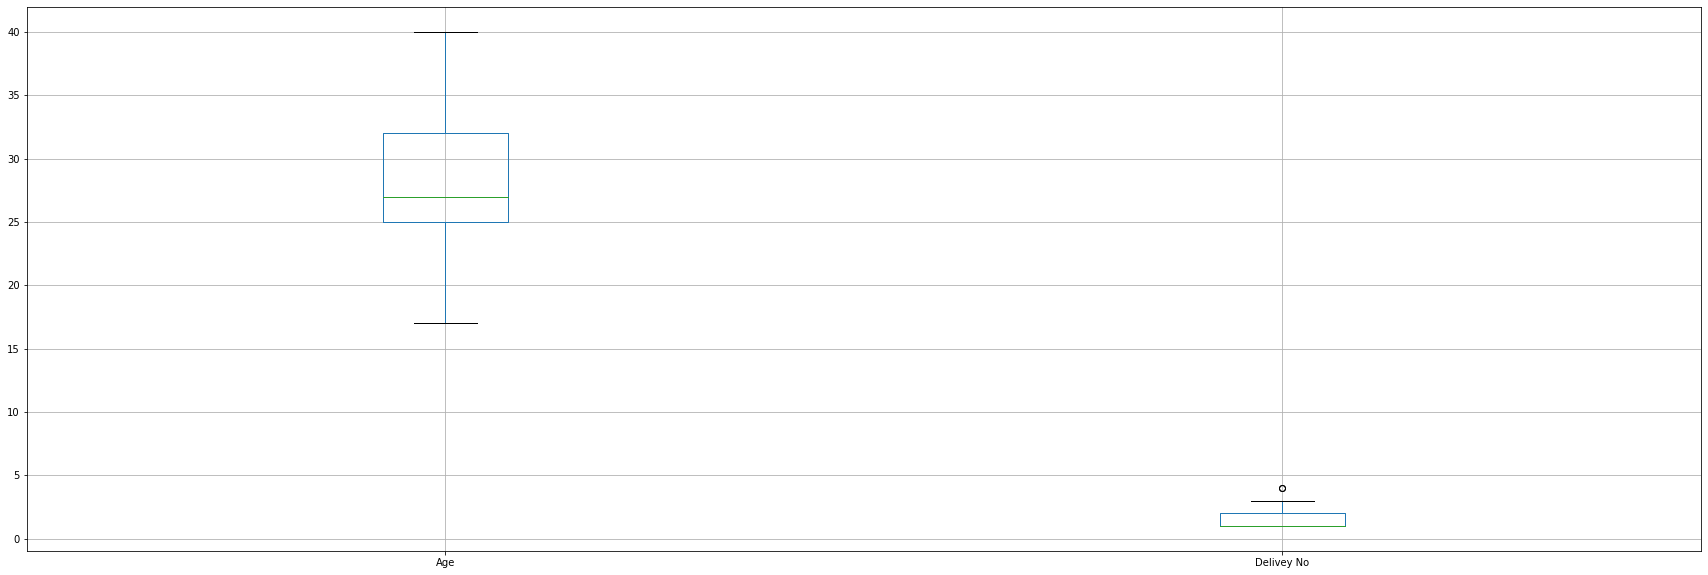

In [9]:
plt.figure(figsize=(30,10))
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017A6C1838C8>,
      dtype=object)

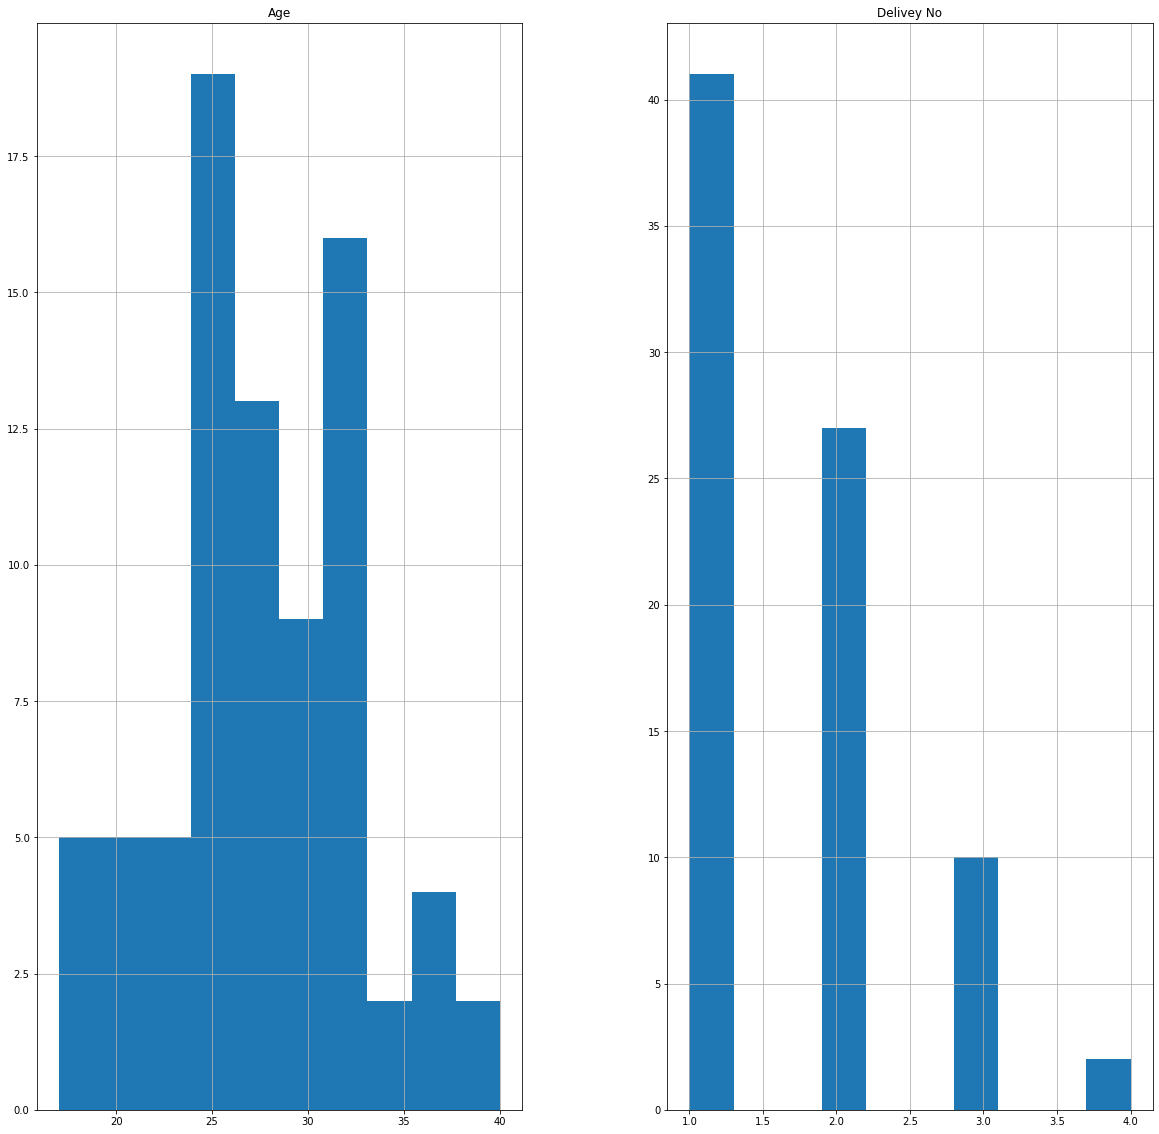

In [10]:
df.hist(column=['Age','Delivey No'],figsize=(20,20))

Text(0, 0.5, '')

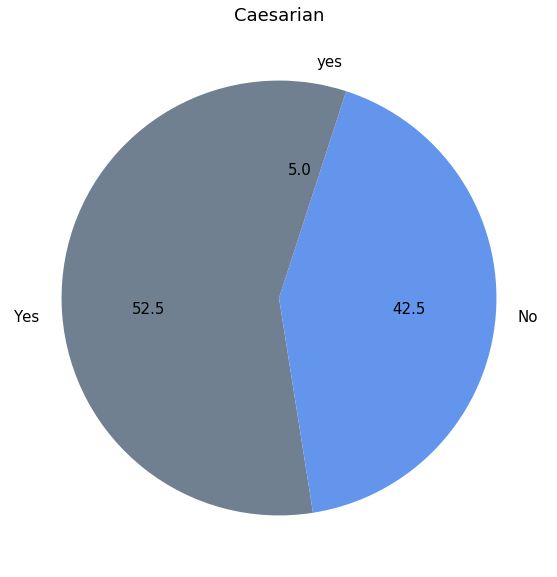

In [11]:
plt.figure(figsize=(10,10))
df['Caesarian'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,colors=['slategray','cornflowerblue'])
plt.title('Caesarian', fontsize = 18)
plt.ylabel('')

In [12]:
df.replace('yes','Yes',inplace = True) 

Text(0, 0.5, '')

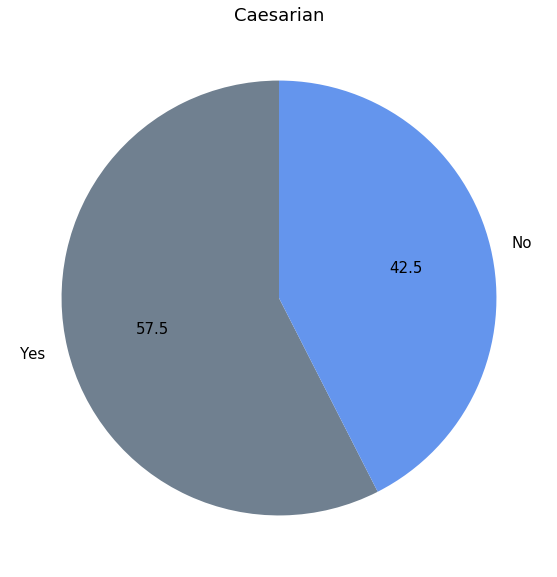

In [13]:
plt.figure(figsize=(10,10))
df['Caesarian'].value_counts().plot(kind='pie',autopct='%1.1f', textprops={'fontsize': 15},startangle=90,colors=['slategray','cornflowerblue'])
plt.title('Caesarian', fontsize = 18)
plt.ylabel('')

## Data preprocessing

In [14]:
le = LabelEncoder()

df['Caesarian'] = le.fit_transform(df['Caesarian'])
df.head()

,Age,Delivey No,Delivery No,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,0
1,26,2,Timely,Normal,apt,1
2,26,2,Premature,Normal,apt,0
3,28,1,Timely,High,apt,0
4,22,2,Timely,Normal,apt,1


In [15]:
df = pd.get_dummies(df,columns = ['Delivery No','Blood of Pressure','Heart Problem','Delivey No'])

In [16]:
y = pd.Series(df['Caesarian'])

In [17]:
df = df.drop(['Caesarian'],axis=1)

In [18]:
LR_pca=LogisticRegression()
rfc_pca=RandomForestClassifier(n_estimators=100,random_state=0)
knn_pca=KNeighborsClassifier()

In [19]:
models_pca=[]
models_pca.append(('Logistic',LR_pca))
models_pca.append(('Random Forest',rfc_pca))
models_pca.append(('KNN',knn_pca))

In [20]:
results_pca=[]
acc_score_pca=[]
f1_score_pca=[]
precision_score_pca=[]
recall_score_pca=[]
names_pca=[]
for name,model in models_pca:
    kfold=model_selection.KFold(shuffle=True,n_splits=10,random_state=0)
    cv_results=model_selection.cross_val_score(model,df,y,cv=kfold,scoring='roc_auc')
    results_pca.append(cv_results)
    f1=model_selection.cross_val_score(model,df,y,cv=kfold,scoring='f1_weighted')
    f1_score_pca.append(np.mean(f1))
    
    acc=model_selection.cross_val_score(model,df,y,cv=kfold,scoring='accuracy')
    acc_score_pca.append(np.mean(acc))
    
    p=model_selection.cross_val_score(model,df,y,cv=kfold,scoring='precision_weighted')
    precision_score_pca.append(np.mean(p))
    
    r=model_selection.cross_val_score(model,df,y,cv=kfold,scoring='recall_weighted')
    recall_score_pca.append(np.mean(r))
    
    names_pca.append(name)

result_pca_df=pd.DataFrame({'Model':names_pca,
                           'Accuracy Score':acc_score_pca,
                            'F1 Score':f1_score_pca,
                            'Precision Score':precision_score_pca,
                            'Recall Score':recall_score_pca})

D:\Ankit\Education\CSE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
D:\Ankit\Education\CSE\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

In [21]:
result_pca_df

,Model,Accuracy Score,F1 Score,Precision Score,Recall Score
0,Logistic,0.6625,0.659411,0.704702,0.6625
1,Random Forest,0.6000,0.605859,0.653333,0.6000
2,KNN,0.6500,0.646473,0.700863,0.6500
